#Exploratory Data Analysis¶

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.

We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import psycopg2

In [481]:
try:
    conn_string = "host="+dsn_hostname+" port="+dsn_port+" dbname="+dsn_database+" user="+dsn_uid+" password="+dsn_pwd
    conn=psycopg2.connect(conn_string)
    print("Connected!\n")
except:
    print("Unable to connect to the database.")

Connected!



# 1

Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers.


In [44]:
cursor = conn.cursor()

In [14]:
cursor.execute("""
                SELECT arr_delay, COUNT(arr_delay)
                FROM flights
                GROUP BY arr_delay
                """)


rows = cursor.fetchall()

In [41]:
rows[-1:-150:-1]

[(None, 0),
 (2973.0, 1),
 (2965.0, 1),
 (2923.0, 1),
 (2695.0, 1),
 (2692.0, 1),
 (2649.0, 1),
 (2635.0, 1),
 (2475.0, 1),
 (2454.0, 1),
 (2350.0, 1),
 (2206.0, 1),
 (2153.0, 1),
 (2108.0, 1),
 (2075.0, 1),
 (2069.0, 1),
 (2050.0, 1),
 (2041.0, 1),
 (2034.0, 1),
 (2023.0, 1),
 (1976.0, 1),
 (1968.0, 1),
 (1966.0, 1),
 (1933.0, 1),
 (1928.0, 1),
 (1916.0, 1),
 (1910.0, 1),
 (1909.0, 1),
 (1866.0, 1),
 (1865.0, 1),
 (1863.0, 1),
 (1861.0, 2),
 (1848.0, 1),
 (1847.0, 1),
 (1844.0, 1),
 (1843.0, 1),
 (1842.0, 1),
 (1797.0, 1),
 (1795.0, 1),
 (1792.0, 1),
 (1783.0, 1),
 (1780.0, 1),
 (1779.0, 1),
 (1778.0, 1),
 (1773.0, 1),
 (1768.0, 1),
 (1767.0, 1),
 (1757.0, 1),
 (1756.0, 1),
 (1752.0, 1),
 (1751.0, 1),
 (1747.0, 1),
 (1744.0, 1),
 (1737.0, 1),
 (1734.0, 1),
 (1726.0, 1),
 (1724.0, 1),
 (1717.0, 1),
 (1707.0, 1),
 (1704.0, 1),
 (1701.0, 1),
 (1700.0, 1),
 (1692.0, 1),
 (1685.0, 2),
 (1665.0, 1),
 (1660.0, 1),
 (1658.0, 1),
 (1657.0, 1),
 (1654.0, 1),
 (1652.0, 1),
 (1650.0, 1),
 (1649.0

In [21]:
type(rows[0][0])

float

In [25]:
occurences = []

for i in range(len(rows)):
    x = rows[i][0]
    y = rows[i][1]
    for j in range(y):
        occurences.append(x)

In [26]:
occurences

[-1290.0,
 -475.0,
 -260.0,
 -258.0,
 -254.0,
 -253.0,
 -247.0,
 -245.0,
 -244.0,
 -243.0,
 -241.0,
 -233.0,
 -231.0,
 -230.0,
 -227.0,
 -222.0,
 -222.0,
 -220.0,
 -219.0,
 -217.0,
 -214.0,
 -208.0,
 -200.0,
 -198.0,
 -198.0,
 -197.0,
 -195.0,
 -194.0,
 -194.0,
 -191.0,
 -190.0,
 -186.0,
 -182.0,
 -177.0,
 -176.0,
 -175.0,
 -175.0,
 -172.0,
 -170.0,
 -169.0,
 -169.0,
 -166.0,
 -165.0,
 -163.0,
 -161.0,
 -160.0,
 -158.0,
 -156.0,
 -155.0,
 -154.0,
 -151.0,
 -147.0,
 -145.0,
 -145.0,
 -142.0,
 -140.0,
 -140.0,
 -140.0,
 -138.0,
 -136.0,
 -136.0,
 -132.0,
 -130.0,
 -130.0,
 -129.0,
 -129.0,
 -126.0,
 -126.0,
 -125.0,
 -124.0,
 -123.0,
 -121.0,
 -121.0,
 -120.0,
 -120.0,
 -119.0,
 -117.0,
 -112.0,
 -108.0,
 -108.0,
 -107.0,
 -106.0,
 -106.0,
 -104.0,
 -102.0,
 -100.0,
 -99.0,
 -98.0,
 -97.0,
 -94.0,
 -94.0,
 -94.0,
 -94.0,
 -94.0,
 -93.0,
 -91.0,
 -91.0,
 -90.0,
 -89.0,
 -89.0,
 -89.0,
 -88.0,
 -88.0,
 -88.0,
 -87.0,
 -87.0,
 -87.0,
 -87.0,
 -86.0,
 -86.0,
 -86.0,
 -85.0,
 -85.0,
 -85.0,
 

In [29]:
len(occurences)

15615741

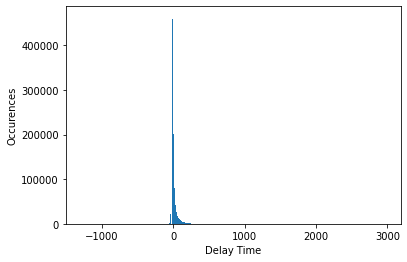

In [31]:
# plotting results of all delay times to determine distribution

plt.hist(occurences, density=False, bins=10000)  # density=False would make counts
plt.ylabel('Occurences')
plt.xlabel('Delay Time')
plt.show()

In [32]:
# testing normality

from scipy.stats import normaltest

normaltest(occurences)

NormaltestResult(statistic=22728920.770479985, pvalue=0.0)

In [45]:
# testing execution of queries into database

cursor.execute("""
                SELECT AVG(arr_delay)
                FROM flights
                WHERE arr_delay > -300
                AND arr_delay < 1650
                
                """)


rows1 = cursor.fetchall()
rows1

[(5.46710319834561,)]

In [48]:
# retrieving value by index of list and tuple

avg = rows1[0][0]

In [50]:
print(f"The average delay is: {avg:.2f} minutes.")

The average delay is: 5.47 minutes.


##### Based on the graphing and returned statistical values. We cannot reject the null hypothesis of the delays being from a normal distribution. We can reject the null hypothesis that the mean delay is 0 however. 

# 2
 Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [55]:
# setting month numbers to a list

months = [1,2,3,4,5,6,7,8,9,10,11,12]

# initializing empty list to append into

month_avgs = []

for k in range(len(months)):
    
    cursor = conn.cursor()
    month = months[k]
    if month in range(10):                 # setting if else condition to account for different lengths of month input
        cursor.execute(f"""                                  
                    SELECT AVG(arr_delay)
                    FROM flights
                    WHERE fl_date LIKE '%-0{month}-%'
                    """)
    else:
        cursor.execute(f"""
                    SELECT AVG(arr_delay)
                    FROM flights
                    WHERE fl_date LIKE '%-{month}-%'
                    """)


    result = cursor.fetchall()
    month_avgs.append(result[0][0])
    

In [56]:
# saving monthly averages

month_avgs

[3.9587876597859,
 6.74509556432229,
 2.81877285101894,
 4.15913078165362,
 6.51114445480937,
 10.4144436765208,
 8.97751514360558,
 8.89889011848589,
 1.70845239337149,
 2.85358478537249,
 2.99360673729268,
 5.11063589307899]

In [57]:
# setting a list of month abbreviations

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [58]:
# creating dataframe from average monthly delays and month abbreviations

delays = pd.DataFrame({'Month': months, 'Average Delay': month_avgs}, columns=['Month', 'Average Delay'])

In [572]:
# displaying dataframe rounded to 2 digits after decimal

delays.round(2)

Month  Average Delay
0    Jan           3.96
1    Feb           6.75
2    Mar           2.82
3    Apr           4.16
4    May           6.51
5    Jun          10.41
6    Jul           8.98
7    Aug           8.90
8    Sep           1.71
9    Oct           2.85
10   Nov           2.99
11   Dec           5.11

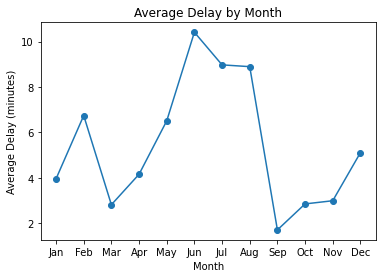

In [480]:
# plotting average delays by month for a visual representation

plt.plot(delays['Month'], delays['Average Delay'], marker='o')
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')

plt.show()

In [232]:
# defining function to return results of SQL query

def SQL_get(query):
    cursor = conn.cursor()               # initializing new cursor
    query=query
    cursor.execute(f"""{query}""")       # executing the query
    rows = cursor.fetchall()             # setting variable as the result of query
    
    return rows                          # returning results of query

In [488]:
# test query to return average delay for each carrier for each month

query_a = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-10-%' GROUP BY mkt_carrier"
res_1 = SQL_get(query_a)
res_1

[('AA', 4.88661281427784),
 ('AS', 0.153507125477928),
 ('B6', 3.74526260440472),
 ('DL', -0.216292663895279),
 ('F9', 10.5843349796757),
 ('G4', 4.75899000389459),
 ('HA', 2.76889488216785),
 ('NK', -1.23072131147541),
 ('UA', 5.49986902766136),
 ('WN', 0.946609243146343)]

In [498]:
# initializing a list and queries to retrieve results of the average delay per month for each carrier

carrier_months = []
for j in range(len(months)):
    cursor = conn.cursor()
    month = months[j]
    if month == 'Jan':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-01-%' GROUP BY mkt_carrier"
    elif month == 'Feb':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-02-%' GROUP BY mkt_carrier"
    elif month == 'Mar':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-03-%' GROUP BY mkt_carrier"
    elif month == 'Apr':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-04-%' GROUP BY mkt_carrier"
    elif month == 'May':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-05-%' GROUP BY mkt_carrier"
    elif month == 'Jun':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-06-%' GROUP BY mkt_carrier"
    elif month == 'Jul':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-07-%' GROUP BY mkt_carrier"
    elif month == 'Aug':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-08-%' GROUP BY mkt_carrier"
    elif month == 'Sep':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-09-%' GROUP BY mkt_carrier"
    elif month == 'Oct':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-10-%' GROUP BY mkt_carrier"
    elif month == 'Nov':
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-11-%' GROUP BY mkt_carrier"
    else:
        query = "SELECT mkt_carrier, AVG(arr_delay) AS avg_delay FROM flights WHERE fl_date LIKE '%-12-%' GROUP BY mkt_carrier"
    
    res = SQL_get(query)
    
    carrier_months.append(res)
    


In [499]:
carrier_months

[[('AA', 4.57415591523966),
  ('AS', -1.66673569846909),
  ('B6', 14.760556447298),
  ('DL', 2.45561103330695),
  ('F9', 7.80975943570037),
  ('G4', 7.88513110846246),
  ('HA', 0.830900070871722),
  ('NK', 1.184913912802),
  ('UA', 8.18739526443289),
  ('VX', -2.75363079615048),
  ('WN', -0.198947063820254)],
 [('AA', 7.21456264039622),
  ('AS', 5.15684359057853),
  ('B6', 9.96443933968426),
  ('DL', 4.10097976852349),
  ('F9', 9.11194983161073),
  ('G4', 9.15535146591311),
  ('HA', 6.72665216412872),
  ('NK', 6.17198229818404),
  ('UA', 9.86891102425083),
  ('VX', -0.905862134810006),
  ('WN', 5.4662682911379)],
 [('AA', 2.60814855628192),
  ('AS', -1.07450502307063),
  ('B6', 11.3481171548117),
  ('DL', 1.11115077507502),
  ('F9', 4.65474231728677),
  ('G4', 4.04263426188147),
  ('HA', 1.8807903257781),
  ('NK', -0.659542806484296),
  ('UA', 4.37971474855335),
  ('VX', 8.08272859216255),
  ('WN', 2.99822855188501)],
 [('AA', 4.12738456107033),
  ('AS', -1.25447307593528),
  ('B6', 12

In [504]:
for i in range(len(carrier_months)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [579]:
# creating a loop and if else condition to take results of each query into a dataframe
# the if else condition creates a single dataframe for the first result, and then for each additonal dataframe created,
# it then concatenates to the original dataframe

for x in range(len(carrier_months)):
    if x == 0:
        df = pd.DataFrame(carrier_months[x]).set_index(0)
        
    else:
        df_x = pd.DataFrame(carrier_months[x]).set_index(0)
        df = pd.concat([df, df_x], axis=1)
        
# setting columns to the month abbreviations
# round the whole dataframe to 2 digits after the zero
# setting the dataframe to its own transpose for betting formatting
        
df.columns = months
df = df.round(2)
df = df.T
df

AA    AS     B6    DL     F9     G4    HA     NK     UA    VX    WN
Jan   4.57 -1.67  14.76  2.46   7.81   7.89  0.83   1.18   8.19 -2.75 -0.20
Feb   7.21  5.16   9.96  4.10   9.11   9.16  6.73   6.17   9.87 -0.91  5.47
Mar   2.61 -1.07  11.35  1.11   4.65   4.04  1.88  -0.66   4.38  8.08  3.00
Apr   4.13 -1.25  12.94  2.69   7.46   7.29  1.14   4.53   4.74   NaN  4.80
May   8.47 -0.09   8.36  1.83  15.69   9.80  0.37   8.30   9.74   NaN  6.84
Jun  11.88  0.54  11.07  7.24  21.38  16.31  1.24  11.22  16.80   NaN  7.23
Jul  10.12 -0.23  17.14  6.13  18.38  14.12  0.78  12.07  13.08   NaN  6.42
Aug   9.80  4.96  19.28  5.21  16.01  10.68  0.77  14.72  14.31   NaN  4.15
Sep   3.63 -1.04   2.22 -1.24   8.37   1.82 -0.76  -0.44   5.53   NaN -1.37
Oct   4.89  0.15   3.75 -0.22  10.58   4.76  2.77  -1.23   5.50   NaN  0.95
Nov   3.09  0.10   8.05  0.64   7.48   6.82 -1.10   1.11   7.25   NaN  0.55
Dec   5.94  3.59  16.30 -0.43   6.38   9.28  0.98   2.29   9.17   NaN  4.40

In [515]:
# creating a mapping dictionary to rename airline abbreviations to proper airline names

airline_map = {'AA':'American Airlines', 
               'AS':'Alaska Airlines', 
               'B6':'Jetblue Airways',
               'DL':'Delta Air Lines',
               'F9':'Frontier Airlines',
               'G4':'Allegiant Air',
               'HA':'Hawaiian Airlines',
               'NK':'Spirit Airlines',
               'UA':'United Airlines',
               'VX':'Virgin America',
               'WN':'Southwest Airlines'
               }

In [580]:
# renaning columns using mapping dictionary

df_airline_delays = df.rename(airline_map, axis=1)
df_airline_delays

American Airlines  Alaska Airlines  Jetblue Airways  Delta Air Lines  \
Jan               4.57            -1.67            14.76             2.46   
Feb               7.21             5.16             9.96             4.10   
Mar               2.61            -1.07            11.35             1.11   
Apr               4.13            -1.25            12.94             2.69   
May               8.47            -0.09             8.36             1.83   
Jun              11.88             0.54            11.07             7.24   
Jul              10.12            -0.23            17.14             6.13   
Aug               9.80             4.96            19.28             5.21   
Sep               3.63            -1.04             2.22            -1.24   
Oct               4.89             0.15             3.75            -0.22   
Nov               3.09             0.10             8.05             0.64   
Dec               5.94             3.59            16.30            -0.43   

     Frontier Airlines  Allegiant Air  Hawaiian Airlines  Spirit Airlines  \
Jan               7.81           7.89               0.83             1.18   
Feb               9.11           9.16               6.73             6.17   
Mar               4.65           4.04               1.88            -0.66   
Apr               7.46           7.29               1.14             4.53   
May              15.69           9.80               0.37             8.30   
Jun              21.38          16.31               1.24            11.22   
Jul              18.38          14.12               0.78            12.07   
Aug              16.01          10.68               0.77            14.72   
Sep               8.37           1.82              -0.76            -0.44   
Oct              10.58           4.76               2.77            -1.23   
Nov               7.48           6.82              -1.10             1.11   
Dec               6.38           9.28               0.98             2.29   

     United Airlines  Virgin America  Southwest Airlines  
Jan             8.19           -2.75               -0.20  
Feb             9.87           -0.91                5.47  
Mar             4.38            8.08                3.00  
Apr             4.74             NaN                4.80  
May             9.74             NaN                6.84  
Jun            16.80             NaN                7.23  
Jul            13.08             NaN                6.42  
Aug            14.31             NaN                4.15  
Sep             5.53             NaN               -1.37  
Oct             5.50             NaN                0.95  
Nov             7.25             NaN                0.55  
Dec             9.17             NaN                4.40

In [582]:
# replacing NaN values with '--'

df_delays_1 = df_airline_delays.replace(np.NaN,'--')
df_delays_1

American Airlines  Alaska Airlines  Jetblue Airways  Delta Air Lines  \
Jan               4.57            -1.67            14.76             2.46   
Feb               7.21             5.16             9.96             4.10   
Mar               2.61            -1.07            11.35             1.11   
Apr               4.13            -1.25            12.94             2.69   
May               8.47            -0.09             8.36             1.83   
Jun              11.88             0.54            11.07             7.24   
Jul              10.12            -0.23            17.14             6.13   
Aug               9.80             4.96            19.28             5.21   
Sep               3.63            -1.04             2.22            -1.24   
Oct               4.89             0.15             3.75            -0.22   
Nov               3.09             0.10             8.05             0.64   
Dec               5.94             3.59            16.30            -0.43   

     Frontier Airlines  Allegiant Air  Hawaiian Airlines  Spirit Airlines  \
Jan               7.81           7.89               0.83             1.18   
Feb               9.11           9.16               6.73             6.17   
Mar               4.65           4.04               1.88            -0.66   
Apr               7.46           7.29               1.14             4.53   
May              15.69           9.80               0.37             8.30   
Jun              21.38          16.31               1.24            11.22   
Jul              18.38          14.12               0.78            12.07   
Aug              16.01          10.68               0.77            14.72   
Sep               8.37           1.82              -0.76            -0.44   
Oct              10.58           4.76               2.77            -1.23   
Nov               7.48           6.82              -1.10             1.11   
Dec               6.38           9.28               0.98             2.29   

     United Airlines Virgin America  Southwest Airlines  
Jan             8.19          -2.75               -0.20  
Feb             9.87          -0.91                5.47  
Mar             4.38           8.08                3.00  
Apr             4.74             --                4.80  
May             9.74             --                6.84  
Jun            16.80             --                7.23  
Jul            13.08             --                6.42  
Aug            14.31             --                4.15  
Sep             5.53             --               -1.37  
Oct             5.50             --                0.95  
Nov             7.25             --                0.55  
Dec             9.17             --                4.40

In [573]:
df_airline_delays.mean()

American Airlines      6.361667
Alaska Airlines        0.762500
Jetblue Airways       11.265000
Delta Air Lines        2.460000
Frontier Airlines     11.108333
Allegiant Air          8.497500
Hawaiian Airlines      1.302500
Spirit Airlines        4.938333
United Airlines        9.046667
Virgin America         1.473333
Southwest Airlines     3.520000
dtype: float64

In [586]:
# dataframe for average delays for each airliner overall

avg_delay_line = pd.DataFrame(df_airline_delays.mean().round(2))
avg_delay_line = avg_delay_line.rename({0:'Average Delay'}, axis=1)
avg_delay_line.reset_index()

index  Average Delay
0    American Airlines           6.36
1      Alaska Airlines           0.76
2      Jetblue Airways          11.26
3      Delta Air Lines           2.46
4    Frontier Airlines          11.11
5        Allegiant Air           8.50
6    Hawaiian Airlines           1.30
7      Spirit Airlines           4.94
8      United Airlines           9.05
9       Virgin America           1.47
10  Southwest Airlines           3.52

<ipython-input-524-49166edcc34d>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_airline_delays.index, Fontsize=15)
<ipython-input-524-49166edcc34d>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(df_airline_delays.index, Fontsize=15)
<ipython-input-524-49166edcc34d>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


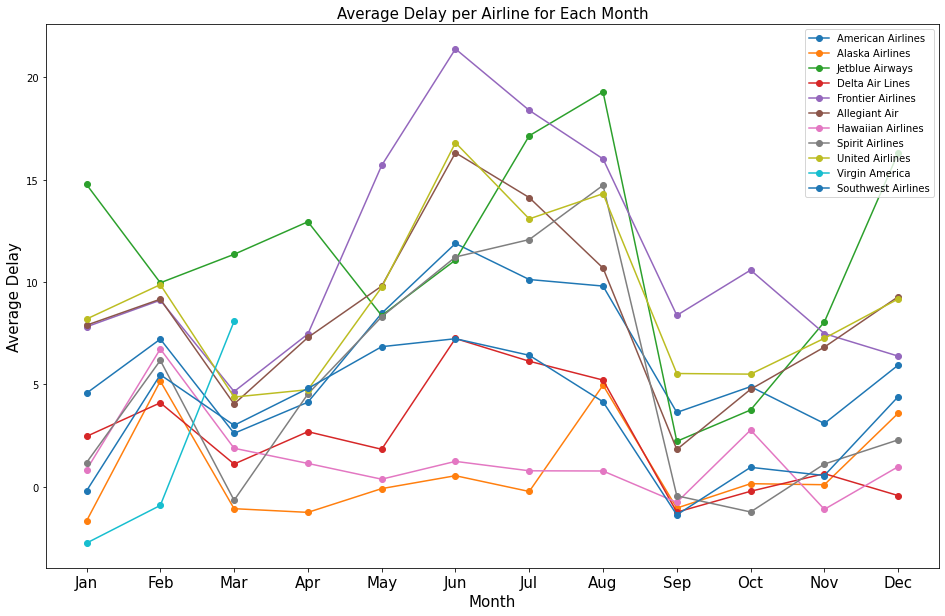

In [524]:
# setting a plot and subplot to visualize all of the average monthly delays for each airlin

fig, ax = plt.subplots(figsize=(16,10))

ax.plot(df_airline_delays.index, df_airline_delays['American Airlines'], label='American Airlines', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Alaska Airlines'], label='Alaska Airlines', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Jetblue Airways'], label='Jetblue Airways', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Delta Air Lines'], label='Delta Air Lines', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Frontier Airlines'], label='Frontier Airlines', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Allegiant Air'], label='Allegiant Air', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Hawaiian Airlines'], label='Hawaiian Airlines', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Spirit Airlines'], label='Spirit Airlines', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['United Airlines'], label='United Airlines', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Virgin America'], label='Virgin America', marker='o')
ax.plot(df_airline_delays.index, df_airline_delays['Southwest Airlines'], label='Southwest Airlines', marker='o')


ax.set_xticklabels(df_airline_delays.index, Fontsize=15)
ax.set_xlabel('Month', size=15)
ax.set_ylabel('Average Delay', rotation=90,size=15)
ax.set_title('Average Delay per Airline for Each Month',size=15)
ax.legend()

fig.show()

The average monthly delay varies throughout the year. With the largest delays coming in the "summer" months. June, July and August. A potential reason for this is school being out for the summer leading to more vacations. Another possibility could be that more people in general (not just students) wish to travel during the summer when the weather is nicer. Another interesting point from this exploration: the lowest average delay is in September, when all the students have gone back to school. This is reflected amongst all airlines overall.

# 3
Task 3: Does the weather affect the delay?
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:

sunny
cloudy
rainy
snow. Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [126]:
# setting a pandas dataframe from pruned data selected for weather conditions

data = pd.read_csv("./pruned_data.csv")


/Users/shmaze/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [536]:
# setting a pandas dataframe from weather.csv data

weather_data = pd.read_csv("./weather.csv")

In [537]:
data.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 AA       AA_CODESHARE          AA   
1  2018-01-01                 AA       AA_CODESHARE          AA   
2  2018-01-01                 AA       AA_CODESHARE          AA   
3  2018-01-01                 AA       AA_CODESHARE          AA   
4  2018-01-01                 AA       AA_CODESHARE          AA   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                3758                MQ   N533AE               3758   
1                3315                MQ   N234JW               3315   
2                3366                MQ   N521AE               3366   
3                3756                MQ   N236NN               3756   
4                3755                MQ   N648AE               3755   

   origin_airport_id origin  ... security_delay  late_aircraft_delay  \
0              11057    CLT  ...            0.0                 34.0   
1              12992    LIT  ...            NaN                  NaN   
2              15016    STL  ...            NaN                  NaN   
3              11298    DFW  ...            NaN                  NaN   
4              15411    TYR  ...            0.0                  0.0   

  first_dep_time total_add_gtime  longest_add_gtime  no_name  Year  Month  \
0            NaN             NaN                NaN      NaN  2018      1   
1            NaN             NaN                NaN      NaN  2018      1   
2            NaN             NaN                NaN      NaN  2018      1   
3            NaN             NaN                NaN      NaN  2018      1   
4            NaN             NaN                NaN      NaN  2018      1   

   Day  Hour  
0    1    18  
1    1     9  
2    1    12  
3    1    12  
4    1     9  

[5 rows x 46 columns]

In [542]:
# creating a sample data modification to create a datetime object from string in dataframe

sample = data.fl_date[0]
samp = pd.to_datetime(sample).date()
samp

datetime.date(2018, 1, 1)

In [544]:
# applying lambda function to create datetime object column

data['fl_date_dt'] = data['fl_date'].apply(lambda x: pd.to_datetime(x).date())

In [539]:
weather_data.head()

AirportCode WeatherDate  Snow  Rain  Fog  Storm  Precipitation  Hail  Light  \
0         ORD  2018-01-03     1     0    0      0              0     0      1   
1         ORD  2018-01-07     1     0    0      0              0     0      1   
2         ORD  2018-01-07     1     0    0      0              0     0      1   
3         ORD  2018-01-07     0     1    0      0              0     0      1   
4         ORD  2018-01-07     0     1    0      0              0     0      1   

   Moderate  Heavy  Severe  UNK  Other  AM/PM  
0         0      0       0    0      0      0  
1         0      0       0    0      0      0  
2         0      0       0    0      0      1  
3         0      0       0    0      0      1  
4         0      0       0    0      0      1

In [543]:
type(weather_data.WeatherDate[0])

str

In [545]:
# applying lambda function to create datetime object column


weather_data['WeatherDate_dt'] = weather_data['WeatherDate'].apply(lambda x: pd.to_datetime(x).date())

In [546]:
data.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 AA       AA_CODESHARE          AA   
1  2018-01-01                 AA       AA_CODESHARE          AA   
2  2018-01-01                 AA       AA_CODESHARE          AA   
3  2018-01-01                 AA       AA_CODESHARE          AA   
4  2018-01-01                 AA       AA_CODESHARE          AA   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                3758                MQ   N533AE               3758   
1                3315                MQ   N234JW               3315   
2                3366                MQ   N521AE               3366   
3                3756                MQ   N236NN               3756   
4                3755                MQ   N648AE               3755   

   origin_airport_id origin  ... late_aircraft_delay  first_dep_time  \
0              11057    CLT  ...                34.0             NaN   
1              12992    LIT  ...                 NaN             NaN   
2              15016    STL  ...                 NaN             NaN   
3              11298    DFW  ...                 NaN             NaN   
4              15411    TYR  ...                 0.0             NaN   

  total_add_gtime longest_add_gtime  no_name  Year  Month  Day  Hour  \
0             NaN               NaN      NaN  2018      1    1    18   
1             NaN               NaN      NaN  2018      1    1     9   
2             NaN               NaN      NaN  2018      1    1    12   
3             NaN               NaN      NaN  2018      1    1    12   
4             NaN               NaN      NaN  2018      1    1     9   

   fl_date_dt  
0  2018-01-01  
1  2018-01-01  
2  2018-01-01  
3  2018-01-01  
4  2018-01-01  

[5 rows x 47 columns]

In [547]:
weather_data.head()

AirportCode WeatherDate  Snow  Rain  Fog  Storm  Precipitation  Hail  Light  \
0         ORD  2018-01-03     1     0    0      0              0     0      1   
1         ORD  2018-01-07     1     0    0      0              0     0      1   
2         ORD  2018-01-07     1     0    0      0              0     0      1   
3         ORD  2018-01-07     0     1    0      0              0     0      1   
4         ORD  2018-01-07     0     1    0      0              0     0      1   

   Moderate  Heavy  Severe  UNK  Other  AM/PM WeatherDate_dt  
0         0      0       0    0      0      0     2018-01-03  
1         0      0       0    0      0      0     2018-01-07  
2         0      0       0    0      0      1     2018-01-07  
3         0      0       0    0      0      1     2018-01-07  
4         0      0       0    0      0      1     2018-01-07

In [550]:
weather_data.shape

(423, 16)

In [555]:
# merging two dataframes together where carrier and datetime match

new_df = pd.merge(data, weather_data, how='left', left_on=['fl_date_dt','origin'], right_on=['WeatherDate_dt','AirportCode'])
new_df = new_df.drop(['AirportCode','WeatherDate_dt'], axis=1)
new_df.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 AA       AA_CODESHARE          AA   
1  2018-01-01                 AA       AA_CODESHARE          AA   
2  2018-01-01                 AA       AA_CODESHARE          AA   
3  2018-01-01                 AA       AA_CODESHARE          AA   
4  2018-01-01                 AA       AA_CODESHARE          AA   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                3758                MQ   N533AE               3758   
1                3315                MQ   N234JW               3315   
2                3366                MQ   N521AE               3366   
3                3756                MQ   N236NN               3756   
4                3755                MQ   N648AE               3755   

   origin_airport_id origin  ... Storm  Precipitation Hail Light  Moderate  \
0              11057    CLT  ...   NaN            NaN  NaN   NaN       NaN   
1              12992    LIT  ...   NaN            NaN  NaN   NaN       NaN   
2              15016    STL  ...   NaN            NaN  NaN   NaN       NaN   
3              11298    DFW  ...   NaN            NaN  NaN   NaN       NaN   
4              15411    TYR  ...   NaN            NaN  NaN   NaN       NaN   

   Heavy  Severe  UNK  Other  AM/PM  
0    NaN     NaN  NaN    NaN    NaN  
1    NaN     NaN  NaN    NaN    NaN  
2    NaN     NaN  NaN    NaN    NaN  
3    NaN     NaN  NaN    NaN    NaN  
4    NaN     NaN  NaN    NaN    NaN  

[5 rows x 61 columns]

In [553]:
new_df.Precipitation.isna().sum()

1689854

In [554]:
# counting values of each occurence in column to check dataframe merge worked

new_df.Precipitation.value_counts()

0.0    195859
1.0       526
Name: Precipitation, dtype: int64

#### creating variables of average delays for each type of weather

In [558]:
snow_data = new_df[new_df['Snow'] == 1]
avg_snow_delay = snow_data.arr_delay.mean()
avg_snow_delay

41.15293439261917

In [559]:
rain_data = new_df[new_df['Rain'] == 1]
avg_rain_delay = rain_data.arr_delay.mean()
avg_rain_delay

13.735451571695451

In [560]:
fog_data = new_df[new_df['Fog'] == 1]
avg_fog_delay = fog_data.arr_delay.mean()
avg_fog_delay

7.818974580988311

In [561]:
storm_data = new_df[new_df['Storm'] == 1]
avg_storm_delay = storm_data.arr_delay.mean()
avg_storm_delay

15.073221757322175

In [562]:
hail_data = new_df[new_df['Hail'] == 1]
avg_hail_delay = hail_data.arr_delay.mean()
avg_hail_delay

nan

In [563]:
precip_data = new_df[new_df['Precipitation'] == 1]
avg_precip_delay = precip_data.arr_delay.mean()
avg_precip_delay

57.42914171656687

In [570]:
avg_delay = data.arr_delay.mean()
avg_delay

4.216383284140801

In [571]:
# creating dataframe with all average weather delay types

weather_avg_delays = pd.DataFrame([{'Average':avg_delay,
                                   'Snow':avg_snow_delay,
                                   'Rain':avg_rain_delay,
                                   'Fog':avg_fog_delay,
                                   'Storm':avg_storm_delay,
                                   'Hail':avg_hail_delay,
                                   'Precipitation':avg_precip_delay
                                  }])
weather_avg_delays = weather_avg_delays.rename({0:'Minutes'}).round(2)
weather_avg_delays

Average   Snow   Rain   Fog  Storm  Hail  Precipitation
Minutes     4.22  41.15  13.74  7.82  15.07   NaN          57.43

##### When there is a known weather event of the snow or precipitation variety, the average arrival delay is greatly increased from the overall average, roughly 10x. Rain and storm events cause an overall increase from the average delay time of roughly 3x. While fog causes roughly a 2x increase in the average delay. 

# 4
Task 4: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [127]:
# setting fillna to '2401' so as to be certain time will not be confused with proper times.

data.dep_time = data.dep_time.fillna(2401)

data['Hour'] = data.dep_time.apply(lambda x: 0 if x < 100 else (
                                                1 if x < 200 else(
                                                2 if x < 300 else(
                                                3 if x < 400 else(
                                                4 if x < 500 else(
                                                5 if x < 600 else(
                                                6 if x < 700 else(
                                                7 if x < 800 else(
                                                8 if x < 900 else(
                                                9 if x < 1000 else(
                                                10 if x < 1100 else(
                                                11 if x < 1200 else(
                                                12 if x < 1300 else(
                                                13 if x < 1400 else(
                                                14 if x < 1500 else(
                                                15 if x < 1600 else(
                                                16 if x < 1700 else(
                                                17 if x < 1800 else(
                                                18 if x < 1900 else(
                                                19 if x < 2000 else(
                                                20 if x < 2100 else(
                                                21 if x < 2200 else(
                                                22 if x < 2300 else(
                                                23 if x <= 2400 else 24 
                                                ))))))))))))))))))))))))

In [132]:
data.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 AA       AA_CODESHARE          AA   
1  2018-01-01                 AA       AA_CODESHARE          AA   
2  2018-01-01                 AA       AA_CODESHARE          AA   
3  2018-01-01                 AA       AA_CODESHARE          AA   
4  2018-01-01                 AA       AA_CODESHARE          AA   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                3758                MQ   N533AE               3758   
1                3315                MQ   N234JW               3315   
2                3366                MQ   N521AE               3366   
3                3756                MQ   N236NN               3756   
4                3755                MQ   N648AE               3755   

   origin_airport_id origin  ... security_delay  late_aircraft_delay  \
0              11057    CLT  ...            0.0                 34.0   
1              12992    LIT  ...            NaN                  NaN   
2              15016    STL  ...            NaN                  NaN   
3              11298    DFW  ...            NaN                  NaN   
4              15411    TYR  ...            0.0                  0.0   

  first_dep_time total_add_gtime  longest_add_gtime  no_name  Year  Month  \
0            NaN             NaN                NaN      NaN  2018      1   
1            NaN             NaN                NaN      NaN  2018      1   
2            NaN             NaN                NaN      NaN  2018      1   
3            NaN             NaN                NaN      NaN  2018      1   
4            NaN             NaN                NaN      NaN  2018      1   

   Day  Hour  
0    1    18  
1    1     9  
2    1    12  
3    1    12  
4    1     9  

[5 rows x 46 columns]

In [129]:
taxi['Hour'].value_counts()

24    280188
17     93023
12     91094
6      91053
11     90898
8      90845
15     90114
14     87445
16     87131
7      87071
10     86595
18     85326
9      85005
13     84357
19     78345
20     68996
5      56097
21     49175
22     36621
23     13642
0       5426
4       3930
1       2055
2        699
3        418
Name: Hour, dtype: int64

In [128]:
# taking only wanted columns

taxi = data[['Hour','taxi_out']]

In [154]:
# grouping by each hour range and taking mean value

taxi_by_hour = taxi.groupby('Hour', as_index=False).mean()
taxi_by_hour

Hour   taxi_out
0      0  16.024033
1      1  14.880716
2      2  14.202346
3      3  12.978365
4      4  16.047655
5      5  18.758580
6      6  19.068930
7      7  19.490126
8      8  20.703404
9      9  19.531776
10    10  18.520675
11    11  18.092521
12    12  17.031128
13    13  16.569833
14    14  16.454333
15    15  17.235836
16    16  16.968146
17    17  17.607850
18    18  18.344073
19    19  17.463222
20    20  18.434809
21    21  17.263331
22    22  17.189305
23    23  16.713052
24    24        NaN

In [187]:
total_avg_taxi = taxi['taxi_out'].mean()

In [155]:
taxi_by_hour.rename(columns={'taxi_out':'Average Taxi Time'}, inplace=True)

In [156]:
taxi_by_hour = taxi_by_hour.drop(24)

In [160]:
taxi_by_hour

Hour  Average Taxi Time
0      0          16.024033
1      1          14.880716
2      2          14.202346
3      3          12.978365
4      4          16.047655
5      5          18.758580
6      6          19.068930
7      7          19.490126
8      8          20.703404
9      9          19.531776
10    10          18.520675
11    11          18.092521
12    12          17.031128
13    13          16.569833
14    14          16.454333
15    15          17.235836
16    16          16.968146
17    17          17.607850
18    18          18.344073
19    19          17.463222
20    20          18.434809
21    21          17.263331
22    22          17.189305
23    23          16.713052

In [183]:
# slicing dataframe into 3 equal parts for easier display

t1 = taxi_by_hour.iloc[:8,:]
t2 = taxi_by_hour.iloc[8:16,:]
t3 = taxi_by_hour.iloc[16:,:]

In [184]:
t1 = t1.reset_index()
t2 = t2.reset_index()
t3 = t3.reset_index()

In [185]:
# joining 3 sliced dataframes back together 

taxi_display = pd.concat([t1,t2,t3], axis=1)

In [525]:
taxi_display.drop('index', axis=1).round(2)

Hour  Average Taxi Time  Hour  Average Taxi Time  Hour  Average Taxi Time
0     0              16.02     8              20.70    16              16.97
1     1              14.88     9              19.53    17              17.61
2     2              14.20    10              18.52    18              18.34
3     3              12.98    11              18.09    19              17.46
4     4              16.05    12              17.03    20              18.43
5     5              18.76    13              16.57    21              17.26
6     6              19.07    14              16.45    22              17.19
7     7              19.49    15              17.24    23              16.71

In [190]:
print(f"The average taxi out time for all flights is: {total_avg_taxi: .2f} minutes.")

The average taxi out time for all flights is:  18.05 minutes.


Based on the returned data, The average taxi time is roughly the same all day. If there was one time of day to choose for a shorter taxi time, it would be between 0100 and 0400, these have slightly shorter taxi times than the rest of the day. All other hours of day are within 2.5 minutes of the overall average taxi time.

# 5

Task 5: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [234]:
try:
    conn_string = "host="+dsn_hostname+" port="+dsn_port+" dbname="+dsn_database+" user="+dsn_uid+" password="+dsn_pwd
    conn=psycopg2.connect(conn_string)
    print("Connected!\n")
except:
    print("Unable to connect to the database.")

Connected!



#### new queries to retrieve counts of departure and arrival delays greater than 0

In [214]:
query1= 'SELECT COUNT(dep_delay), COUNT(arr_delay) FROM flights WHERE dep_delay > 0 AND arr_delay > 0'
res = SQL_get(query1)
res

[(3900977, 3900977)]

In [215]:
query2 = 'SELECT COUNT(dep_delay), COUNT(arr_delay > 0) FROM flights WHERE dep_delay > 0'
res2 = SQL_get(query2)
res2

[(5342638, 5315643)]

In [196]:
# count of departure delays and count of arrival delays where arrival delay is greater than 0

In [203]:
pct_delayed_dep = rows2[0][1]/rows2[0][0]*100

print(f"The percent of flights that have an arrival delay that also have an associated departure delay is: {pct_delayed_dep: .2f}%.")

The percent of flights that have an arrival delay that also have an associated departure delay is:  99.49%.


In [216]:
query3 = 'SELECT COUNT(arr_delay) FROM flights WHERE dep_delay > 0 AND actual_elapsed_time > crs_elapsed_time'
res3 = SQL_get(query3)
res3

[(1443771,)]

In [219]:
# count of flights where theres a departure delay, that delay is greater than the resulting arrival delay
# and the actual elapsed time is less than the proected elapsed time

query4 = 'SELECT COUNT(arr_delay) FROM flights WHERE dep_delay > 0 AND dep_delay > arr_delay AND actual_elapsed_time < crs_elapsed_time'
            
res4 = SQL_get(query4)
res4

[(3734049,)]

In [220]:
# count of flights that have a departure delay greater than 0 

query5 = 'SELECT COUNT(dep_delay) FROM flights WHERE dep_delay > 0'
res5 = SQL_get(query5)
res5

[(5342638,)]

In [227]:
pct_flights_fast = res4[0][0]/res5[0][0]*100
print(f"The percentage of flights that have a faster than estimated elapsed time after experiencing a departure delay is: {pct_flights_fast: .2f}%.")

The percentage of flights that have a faster than estimated elapsed time after experiencing a departure delay is:  69.89%.


In [223]:
# count of flights that have a lower than estimated elapsed time

query6 = 'SELECT COUNT(dep_delay) FROM flights WHERE actual_elapsed_time < crs_elapsed_time'
res6 = SQL_get(query6)
res6

[(11089589,)]

In [224]:
# total flights count

query7 = 'SELECT COUNT(dep_delay) FROM flights'
res7 = SQL_get(query7)
res7

[(15663731,)]

In [226]:
pct_flights_fast_overall = res6[0][0]/res7[0][0]*100
print(f"The percentage of overall flights that have a faster than estimated elapsed time: {pct_flights_fast_overall: .2f}%.")

The percentage of overall flights that have a faster than estimated elapsed time:  70.80%.


Overall, the percentage of flights that have a faster than estimated elapsed time is the same whether or not the flight was delayed to start with. 

The percentage of overall flights that have a faster than estimated elapsed time:  70.80%.

The percentage of flights that have a faster than estimated elapsed time after experiencing a departure delay is:  69.89%.

The percent of flights that have an arrival delay that also have an associated departure delay is:  99.49%.

This suggests that airlines are not able to make up much time after experiencing a departure delay.

# 6

Task 6: How many states cover 50% of US air traffic?

In [235]:
# query to retrieve count of flight numbers for each origin city name

query7 = 'SELECT COUNT(DISTINCT mkt_carrier_fl_num), origin_city_name FROM flights GROUP BY origin_city_name'
res8 = SQL_get(query7)
res8

[(10, 'Aberdeen, SD'),
 (27, 'Abilene, TX'),
 (1, 'Adak Island, AK'),
 (15, 'Aguadilla, PR'),
 (284, 'Akron, OH'),
 (57, 'Albany, GA'),
 (1283, 'Albany, NY'),
 (2346, 'Albuquerque, NM'),
 (91, 'Alexandria, LA'),
 (299, 'Allentown/Bethlehem/Easton, PA'),
 (4, 'Alpena, MI'),
 (456, 'Amarillo, TX'),
 (232, 'Anchorage, AK'),
 (396, 'Appleton, WI'),
 (19, 'Arcata/Eureka, CA'),
 (567, 'Asheville, NC'),
 (105, 'Ashland, WV'),
 (201, 'Aspen, CO'),
 (5854, 'Atlanta, GA'),
 (17, 'Atlantic City, NJ'),
 (424, 'Augusta, GA'),
 (3894, 'Austin, TX'),
 (38, 'Bakersfield, CA'),
 (5817, 'Baltimore, MD'),
 (299, 'Bangor, ME'),
 (2, 'Barrow, AK'),
 (494, 'Baton Rouge, LA'),
 (13, 'Beaumont/Port Arthur, TX'),
 (89, 'Belleville, IL'),
 (107, 'Bellingham, WA'),
 (9, 'Bemidji, MN'),
 (196, 'Bend/Redmond, OR'),
 (3, 'Bethel, AK'),
 (218, 'Billings, MT'),
 (9, 'Binghamton, NY'),
 (1414, 'Birmingham, AL'),
 (310, 'Bismarck/Mandan, ND'),
 (175, 'Bloomington/Normal, IL'),
 (1301, 'Boise, ID'),
 (3611, 'Boston, MA'

In [236]:
counts = []
locs = []

for i in range(len(res8)):
    count = res8[i][0]
    loc = res8[i][1]
    counts.append(count)
    locs.append(loc)
    
    
states_df = pd.DataFrame({'Flights':counts, 'Cities':locs}) 


In [237]:
states_df

Flights                 Cities
0         10           Aberdeen, SD
1         27            Abilene, TX
2          1        Adak Island, AK
3         15          Aguadilla, PR
4        284              Akron, OH
..       ...                    ...
363        2           Wrangell, AK
364       10             Yakima, WA
365        3            Yakutat, AK
366        2  Youngstown/Warren, OH
367       39               Yuma, AZ

[368 rows x 2 columns]

In [238]:
# new column with only state information

states_df['State'] = states_df['Cities'].apply(lambda x: x.split(', ')[-1])

In [240]:
# dropping cities column

states_df = states_df.drop('Cities', axis=1)

In [252]:
# getting sum of each state grouping

state_count = states_df.groupby('State', as_index=False).sum()

In [265]:
# viewing sorted number of flights grouped by state

state_count = state_count.sort_values('Flights', ascending=False).reset_index().drop('index', axis=1)
state_count

State  Flights
0     CA    36701
1     TX    27413
2     FL    24429
3     NY    11856
4     MO     9687
5     NC     9256
6     OH     8878
7     TN     8624
8     NV     7830
9     PA     7592
10    IL     7579
11    CO     7573
12    MI     7559
13    GA     7374
14    AZ     7194
15    MD     5881
16    WA     5449
17    LA     5235
18    DC     4888
19    MN     4842
20    WI     4694
21    IN     4204
22    UT     4040
23    VA     3877
24    OR     3805
25    MA     3718
26    SC     3496
27    OK     3307
28    NJ     3054
29    KY     2645
30    AL     2584
31    NE     2464
32    NM     2463
33    CT     1842
34    AR     1816
35    RI     1699
36    IA     1634
37    ID     1555
38    MT     1206
39    ME     1173
40    ND     1159
41    NH     1080
42    HI     1066
43    PR     1028
44    SD      858
45    KS      852
46    MS      650
47    VT      540
48    WY      450
49    AK      401
50    WV      366
51    VI       52
52    TT       25

In [259]:
# total sum of flights

flight_count = state_count.sum().Flights
flight_count

279643

In [262]:
# half of all flights

pct_50 = flight_count/2
pct_50

139821.5

In [266]:
# putting indexes of state into list if the sum of it and all before it are less than half of the total flights

top_50 = []
for i in range(len(state_count)):
    x = sum(state_count.Flights[:i+1])
    if x < pct_50:
        top_50.append(i)
    else:
        pass
    
top_50
    
        

[0, 1, 2, 3, 4, 5, 6, 7]

In [270]:
# returning only those states whioch fell under the indexes listed

top_50_states = state_count[:8]
top_50_states

State  Flights
0    CA    36701
1    TX    27413
2    FL    24429
3    NY    11856
4    MO     9687
5    NC     9256
6    OH     8878
7    TN     8624

8 states cover 50% of US air traffic by amount of departures. They are California, Texas, Florida, New York, Missouri, North Carolina, Ohio and Tennessee

# 7

Task 7: Test the hypothesis whether planes fly faster when there is the departure delay?

In [291]:
try:
    conn_string = "host="+dsn_hostname+" port="+dsn_port+" dbname="+dsn_database+" user="+dsn_uid+" password="+dsn_pwd
    conn=psycopg2.connect(conn_string)
    print("Connected!\n")
except:
    print("Unable to connect to the database.")

Connected!



In [278]:
# queries to select avg air speed in miles per hour when delay is greater and less than 0

query9 = 'SELECT AVG(distance/(air_time/60)) as avg_speed_MPH FROM flights WHERE dep_delay > 0'
query10 = 'SELECT AVG(distance/(air_time/60)) as avg_speed_MPH FROM flights WHERE dep_delay <= 0'

In [281]:
res9 = SQL_get(query9)
res10 = SQL_get(query10)

In [282]:
res9

[(405.334423013515,)]

In [283]:
res10

[(395.631533546325,)]

In [287]:
# calculating percentage increase in average airspeed with a delay vs without

pct_faster_delay = res9[0][0]/res10[0][0]*100 -100
pct_faster_delay

2.45250659880827

In [290]:
print(f"The average airspeed after experiencing a departure delay is {pct_faster_delay: .2f}% faster than a flight that was not delayed.")

The average airspeed after experiencing a departure delay is  2.45% faster than a flight that was not delayed.


# 8

Task 8: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [292]:
# selecting time of departure and time in air 

query11 = 'SELECT dep_time, air_time FROM flights'
res11 = SQL_get(query11)
res11

[(646.0, 67.0),
 (1709.0, 125.0),
 (1739.0, 145.0),
 (2129.0, 41.0),
 (815.0, 47.0),
 (1033.0, 77.0),
 (2329.0, 27.0),
 (1157.0, 54.0),
 (1711.0, 68.0),
 (1457.0, 66.0),
 (1203.0, 93.0),
 (1623.0, 30.0),
 (958.0, 78.0),
 (1227.0, 98.0),
 (702.0, 42.0),
 (832.0, 168.0),
 (1646.0, 27.0),
 (726.0, 113.0),
 (905.0, 96.0),
 (1656.0, 84.0),
 (2019.0, 54.0),
 (2122.0, 32.0),
 (1009.0, 74.0),
 (1839.0, 55.0),
 (1444.0, 86.0),
 (1738.0, 100.0),
 (540.0, 42.0),
 (1942.0, 100.0),
 (1417.0, 146.0),
 (1244.0, 59.0),
 (957.0, 46.0),
 (1140.0, 45.0),
 (1218.0, 144.0),
 (1617.0, 118.0),
 (1957.0, 152.0),
 (617.0, 60.0),
 (2138.0, 55.0),
 (1119.0, 44.0),
 (556.0, 72.0),
 (1312.0, 87.0),
 (2212.0, 93.0),
 (1745.0, 179.0),
 (2139.0, 71.0),
 (546.0, 48.0),
 (1409.0, 41.0),
 (555.0, 89.0),
 (1220.0, 70.0),
 (1440.0, 71.0),
 (1501.0, 81.0),
 (1456.0, 97.0),
 (1654.0, 93.0),
 (1953.0, 85.0),
 (758.0, 50.0),
 (1349.0, 68.0),
 (1553.0, 68.0),
 (2015.0, 80.0),
 (1853.0, 83.0),
 (1436.0, 110.0),
 (2343.0, 51.0),

In [331]:
df_hauls = pd.DataFrame(res11)

In [332]:
# renaming for clarity

df_hauls = df_hauls.rename({0:'Time', 1:'Air Time'}, axis=1)
df_hauls.head()

Time  Air Time
0   646.0      67.0
1  1709.0     125.0
2  1739.0     145.0
3  2129.0      41.0
4   815.0      47.0

In [333]:
# setting new column with only hour portion of time

df_hauls['Hour'] = df_hauls.Time.apply(lambda x: 0 if x < 100 else (
                                                1 if x < 200 else(
                                                2 if x < 300 else(
                                                3 if x < 400 else(
                                                4 if x < 500 else(
                                                5 if x < 600 else(
                                                6 if x < 700 else(
                                                7 if x < 800 else(
                                                8 if x < 900 else(
                                                9 if x < 1000 else(
                                                10 if x < 1100 else(
                                                11 if x < 1200 else(
                                                12 if x < 1300 else(
                                                13 if x < 1400 else(
                                                14 if x < 1500 else(
                                                15 if x < 1600 else(
                                                16 if x < 1700 else(
                                                17 if x < 1800 else(
                                                18 if x < 1900 else(
                                                19 if x < 2000 else(
                                                20 if x < 2100 else(
                                                21 if x < 2200 else(
                                                22 if x < 2300 else(
                                                23 if x <= 2400 else 24 
                                                ))))))))))))))))))))))))

In [334]:
df_hauls.head()

Time  Air Time  Hour
0   646.0      67.0     6
1  1709.0     125.0    17
2  1739.0     145.0    17
3  2129.0      41.0    21
4   815.0      47.0     8

##### Short-haul is a flight lasting anywhere from 30 minutes to 3 hours. Medium-haul is defined by flights lasting between 3-6 hours. And lastly, long-haul flights are those that extend beyond 6 hours.

##### -this does not give very representitive groupings as only a very few amounts of flights are longer than 720 min ( 6 hours ) within the US.
##### - changing this to short: 1 hour or less, medium: 1 to 3 hours, long: 3 hours or more

In [335]:
# converting airtime to haul length

df_hauls['Haul'] = df_hauls['Air Time'].apply(lambda x: 'Long' if x > 180 else(
                                                        'Medium' if x > 60 else 'Short'))

df_hauls.head()

Time  Air Time  Hour    Haul
0   646.0      67.0     6  Medium
1  1709.0     125.0    17  Medium
2  1739.0     145.0    17  Medium
3  2129.0      41.0    21   Short
4   815.0      47.0     8   Short

In [336]:
df_hauls = df_hauls.drop(['Time', 'Air Time'], axis=1)
df_hauls.head()

Hour    Haul
0     6  Medium
1    17  Medium
2    17  Medium
3    21   Short
4     8   Short

In [348]:
# grouping by length of haul and hour and getting the count of flights in each group

hauls = df_hauls.groupby(['Haul','Hour']).size()
hauls

Haul   Hour
Long   0        28063
       1         9668
       2         3376
       3         1663
       4         4817
                ...  
Short  20      216357
       21      168627
       22      164427
       23       44013
       24      258814
Length: 73, dtype: int64

In [350]:
hauls = pd.DataFrame(hauls)
hauls

0
Haul  Hour        
Long  0      28063
      1       9668
      2       3376
      3       1663
      4       4817
...            ...
Short 20    216357
      21    168627
      22    164427
      23     44013
      24    258814

[73 rows x 1 columns]

In [351]:
hauls[0]['Long']

Hour
0      28063
1       9668
2       3376
3       1663
4       4817
5      46998
6     138607
7     153949
8     154913
9     127121
10    119031
11    119271
12    116355
13    103215
14    101900
15    109081
16    107486
17    125838
18    106152
19     95097
20     81982
21     82748
22     76874
23     65689
Name: 0, dtype: int64

In [354]:
hauls[0]['Short']

Hour
0       9722
1       2771
2        783
3        205
4      19604
5     186522
6     248628
7     217924
8     254943
9     252331
10    269204
11    255555
12    266996
13    241530
14    260264
15    266599
16    259156
17    273482
18    252064
19    229701
20    216357
21    168627
22    164427
23     44013
24    258814
Name: 0, dtype: int64

In [359]:
hauls_long = pd.DataFrame(hauls[0]['Long'])
hauls_long = hauls_long.rename({0:'Long'}, axis=1)

hauls_med = pd.DataFrame(hauls[0]['Medium'])
hauls_med = hauls_med.rename({0:'Medium'}, axis=1)

hauls_short = pd.DataFrame(hauls[0]['Short'])
hauls_short = hauls_short.rename({0:'Short'}, axis=1)



In [360]:
hauls_short

Short
Hour        
0       9722
1       2771
2        783
3        205
4      19604
5     186522
6     248628
7     217924
8     254943
9     252331
10    269204
11    255555
12    266996
13    241530
14    260264
15    266599
16    259156
17    273482
18    252064
19    229701
20    216357
21    168627
22    164427
23     44013
24    258814

In [362]:
# creating dataframe of all haul type counts for each hour

all_hauls = pd.concat([hauls_long, hauls_med, hauls_short], axis=1)
all_hauls = all_hauls.drop(24)
all_hauls

Long    Medium   Short
Hour                            
0      28063.0   27076.0    9722
1       9668.0   12975.0    2771
2       3376.0    3875.0     783
3       1663.0    2775.0     205
4       4817.0   17923.0   19604
5      46998.0  386619.0  186522
6     138607.0  604357.0  248628
7     153949.0  577552.0  217924
8     154913.0  567871.0  254943
9     127121.0  535157.0  252331
10    119031.0  542007.0  269204
11    119271.0  584174.0  255555
12    116355.0  582281.0  266996
13    103215.0  532432.0  241530
14    101900.0  543549.0  260264
15    109081.0  561459.0  266599
16    107486.0  519797.0  259156
17    125838.0  575190.0  273482
18    106152.0  529700.0  252064
19     95097.0  509542.0  229701
20     81982.0  464303.0  216357
21     82748.0  289848.0  168627
22     76874.0  201519.0  164427
23     65689.0   55388.0   44013

In [1]:
# selecting max value count hour for each type of haul

In [369]:
most_long = all_hauls.Long.max()
most_med = all_hauls.Medium.max()
most_short = all_hauls.Short.max()

In [390]:
long = all_hauls[all_hauls['Long'] == most_long]
long = long.drop(['Long','Medium', 'Short'], axis=1)
long = long.index[0]

In [391]:
medium = all_hauls[all_hauls['Medium'] == most_med]
medium = medium.drop(['Long','Medium', 'Short'], axis=1)
medium = medium.index[0]

In [392]:
short = all_hauls[all_hauls['Short'] == most_short]
short = short.drop(['Long','Medium', 'Short'], axis=1)
short = short.index[0]

In [393]:
print(f"The most long haul flights depart in the {long}th hour of the day.\nThe most medium haul flights depart in the {medium}th hour of the day.\nThe most short haul flights depart in the {short}th hour of the day.")

The most long haul flights depart in the 8th hour of the day.
The most medium haul flights depart in the 6th hour of the day.
The most short haul flights depart in the 17th hour of the day.


##### The highest number of long haul flights depart between 0800-0900, the most medium haul flights depart between 0500-0600 and the most short haul flights depart between 1700-1800.

# 9

Task 9: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [526]:
try:
    conn_string = "host="+dsn_hostname+" port="+dsn_port+" dbname="+dsn_database+" user="+dsn_uid+" password="+dsn_pwd
    conn=psycopg2.connect(conn_string)
    print("Connected!\n")
except:
    print("Unable to connect to the database.")

Connected!



In [395]:
# selecting count of flights from each city sorted descending taking only top 10

query12 = "SELECT origin, COUNT(origin) AS flights FROM flights GROUP BY origin ORDER BY flights DESC LIMIT 10"
res12 = SQL_get(query12)
res12

[('ORD', 790253),
 ('ATL', 785850),
 ('DFW', 584688),
 ('DEN', 552134),
 ('CLT', 501557),
 ('LAX', 500840),
 ('SEA', 379367),
 ('SFO', 357626),
 ('PHX', 355485),
 ('IAH', 354379)]

In [397]:
# selecting count of passengers from each city sorted descending taking top 10

query13 = 'SELECT origin, SUM(passengers) AS total_passengers FROM passengers WHERE origin IN (SELECT ports.origin FROM (SELECT origin, COUNT(origin) AS flights FROM flights GROUP BY origin ORDER BY flights DESC LIMIT 10) ports) GROUP BY origin'
res13 = SQL_get(query13)
res13

[('ATL', 257478059.0),
 ('CLT', 112838675.0),
 ('DEN', 151024252.0),
 ('DFW', 163888490.0),
 ('IAH', 103908868.0),
 ('LAX', 205745255.0),
 ('ORD', 194019087.0),
 ('PHX', 109444579.0),
 ('SEA', 113960665.0),
 ('SFO', 133266076.0)]

In [402]:
# selecting total passengers

query14 = 'SELECT SUM(passengers) AS total_passengers FROM passengers'
res14 = SQL_get(query14)
res14

[(4929411481.0,)]

In [406]:
# creating dataframe from total passenger counts by airport

passengers = pd.DataFrame(res13)
passengers = passengers.rename({0:'Origin', 1:'Total Passengers'}, axis=1)
passengers

Origin  Total Passengers
0    ATL       257478059.0
1    CLT       112838675.0
2    DEN       151024252.0
3    DFW       163888490.0
4    IAH       103908868.0
5    LAX       205745255.0
6    ORD       194019087.0
7    PHX       109444579.0
8    SEA       113960665.0
9    SFO       133266076.0

In [409]:
busy_passengers = passengers['Total Passengers'].sum()
busy_passengers

1545574006.0

In [410]:
total_passengers = res14[0][0]
total_passengers

4929411481.0

In [411]:
# finding out percentage of passengers handled by 10 busiest airports

pct_busy = busy_passengers/total_passengers*100

print(f"The top 10 busiest airports handle {pct_busy: .2f}% of the total passengers transported.")

The top 10 busiest airports handle  31.35% of the total passengers transported.


In [413]:
query15 = 'SELECT origin, SUM(passengers) AS total_passengers FROM passengers WHERE origin IN (SELECT ports.origin FROM (SELECT origin, COUNT(origin) AS flights FROM flights GROUP BY origin ORDER BY flights DESC) ports) GROUP BY origin ORDER BY total_passengers DESC LIMIT 10'
res15 = SQL_get(query15)
res15

[('ATL', 257478059.0),
 ('LAX', 205745255.0),
 ('ORD', 194019087.0),
 ('DFW', 163888490.0),
 ('DEN', 151024252.0),
 ('JFK', 148927079.0),
 ('SFO', 133266076.0),
 ('LAS', 117526251.0),
 ('SEA', 113960665.0),
 ('CLT', 112838675.0)]

In [472]:
passengers_all = pd.DataFrame(res15)
passengers_all = passengers.rename({'Origin':'Pass_Origin', 1:'Total Passengers'}, axis=1)
passengers_all = passengers_all.sort_values('Total Passengers', ascending=False).reset_index()
passengers_all = passengers_all.drop('index', axis=1)
passengers_all

Pass_Origin  Total Passengers
0         ATL       257478059.0
1         LAX       205745255.0
2         ORD       194019087.0
3         DFW       163888490.0
4         DEN       151024252.0
5         SFO       133266076.0
6         SEA       113960665.0
7         CLT       112838675.0
8         PHX       109444579.0
9         IAH       103908868.0

In [473]:
flights_pop = pd.DataFrame(res12)
flights_pop = flights_pop.rename({0:'Fl_Origin', 1:'Flights'}, axis=1)

In [474]:
flights_v_pass = pd.concat([flights_pop, passengers_all], axis=1)
flights_v_pass

Fl_Origin  Flights Pass_Origin  Total Passengers
0       ORD   790253         ATL       257478059.0
1       ATL   785850         LAX       205745255.0
2       DFW   584688         ORD       194019087.0
3       DEN   552134         DFW       163888490.0
4       CLT   501557         DEN       151024252.0
5       LAX   500840         SFO       133266076.0
6       SEA   379367         SEA       113960665.0
7       SFO   357626         CLT       112838675.0
8       PHX   355485         PHX       109444579.0
9       IAH   354379         IAH       103908868.0

In [436]:
list(flights_v_pass.Pass_Origin)

['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SEA', 'SFO']

In [437]:
for i in flights_v_pass.Fl_Origin:
    if i in list(flights_v_pass.Pass_Origin):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True


<ipython-input-478-32da5c8658b1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(flights_v_pass['Fl_Origin'], rotation=0,Fontsize=10)
<ipython-input-478-32da5c8658b1>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels(flights_v_pass['Fl_Origin'], rotation=0,Fontsize=10)
<ipython-input-478-32da5c8658b1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(flights_v_pass['Pass_Origin'], rotation=0,Fontsize=10)
<ipython-input-478-32da5c8658b1>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels(flights_v_pass['Pass_Origin'], rotation=0,Fontsize=10)
<ipython-input-478-32da5c8658b1>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a 

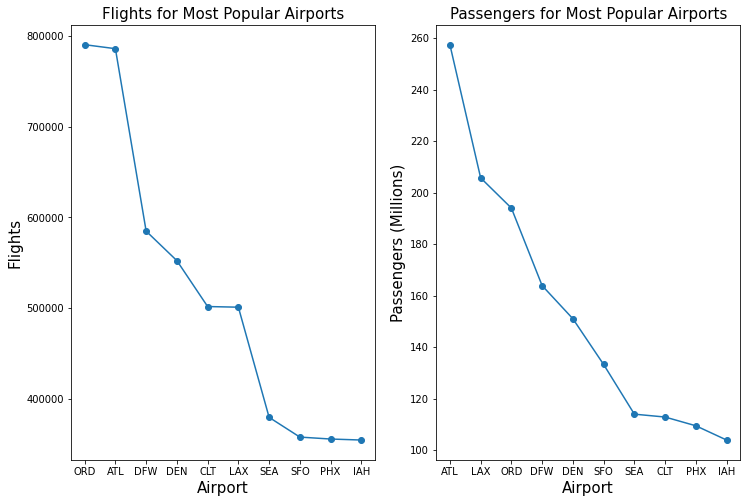

In [478]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))


ax1.plot(flights_v_pass['Fl_Origin'], flights_v_pass['Flights'], marker='o')
ax1.set_xticklabels(flights_v_pass['Fl_Origin'], rotation=0,Fontsize=10)
ax1.set_xlabel('Airport', size=15)
ax1.set_ylabel('Flights', rotation=90,size=15)
ax1.set_title('Flights for Most Popular Airports',size=15)


ax2.plot(flights_v_pass['Pass_Origin'], (flights_v_pass['Total Passengers']/1000000), marker='o')
ax2.set_xticklabels(flights_v_pass['Pass_Origin'], rotation=0,Fontsize=10)
ax2.set_xlabel('Airport',size=15)
ax2.set_ylabel('Passengers (Millions)',size=15)
ax2.set_title('Passengers for Most Popular Airports',size=15)


fig.show()

##### The top 10 busiest airports by flights are also the top ten busiest in terms of overall passengers. Although not in an identical order

# 10

Task 10: Do bigger delays lead to bigger fuel comsumption per passenger?
We need to do four things to answer this as accurate as possible:

Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
Find out distance covered monthly by different air carriers
Find out number of passengers that were carried by different air carriers
Find out total fuel comsumption per air carrier.
Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?



In [531]:
query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-10-%' GROUP BY mkt_carrier"


carrier_months_dist = []
for j in range(len(months)):
    cursor = conn.cursor()
    month = months[j]
    if month == 'Jan':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-01-%' GROUP BY mkt_carrier"    
    elif month == 'Feb':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-02-%' GROUP BY mkt_carrier"
    elif month == 'Mar':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-03-%' GROUP BY mkt_carrier"
    elif month == 'Apr':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-04-%' GROUP BY mkt_carrier"
    elif month == 'May':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-05-%' GROUP BY mkt_carrier"
    elif month == 'Jun':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-06-%' GROUP BY mkt_carrier"
    elif month == 'Jul':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-07-%' GROUP BY mkt_carrier"
    elif month == 'Aug':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-08-%' GROUP BY mkt_carrier"
    elif month == 'Sep':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-09-%' GROUP BY mkt_carrier"
    elif month == 'Oct':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-10-%' GROUP BY mkt_carrier"
    elif month == 'Nov':
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-11-%' GROUP BY mkt_carrier"
    else:
        query = "SELECT mkt_carrier, SUM(distance) as miles FROM flights WHERE fl_date LIKE '%-12-%' GROUP BY mkt_carrier"
    
    res = SQL_get(query)
    
    carrier_months_dist.append(res)
    
carrier_months_dist

[[('AA', 227590375.0),
  ('AS', 59419573.0),
  ('B6', 52116552.0),
  ('DL', 184463459.0),
  ('F9', 20478319.0),
  ('G4', 12384256.0),
  ('HA', 9420638.0),
  ('NK', 29781694.0),
  ('UA', 184573198.0),
  ('VX', 8531335.0),
  ('WN', 160260059.0)],
 [('AA', 211881968.0),
  ('AS', 53720830.0),
  ('B6', 49802741.0),
  ('DL', 170860780.0),
  ('F9', 18637476.0),
  ('G4', 13197523.0),
  ('HA', 8486088.0),
  ('NK', 27206755.0),
  ('UA', 170023195.0),
  ('VX', 7885964.0),
  ('WN', 144088880.0)],
 [('AA', 242068499.0),
  ('AS', 62621782.0),
  ('B6', 57332637.0),
  ('DL', 211228803.0),
  ('F9', 20380109.0),
  ('G4', 18063147.0),
  ('HA', 9554105.0),
  ('NK', 32517109.0),
  ('UA', 204816442.0),
  ('VX', 9447007.0),
  ('WN', 178543842.0)],
 [('AA', 231096363.0),
  ('AS', 70986481.0),
  ('B6', 56059123.0),
  ('DL', 201296140.0),
  ('F9', 20192742.0),
  ('G4', 15671026.0),
  ('HA', 9705482.0),
  ('NK', 32045068.0),
  ('UA', 199979911.0),
  ('WN', 171949227.0)],
 [('AA', 246460150.0),
  ('AS', 74803120.

In [532]:
for y in range(len(carrier_months_dist)):
    if y == 0:
        df = pd.DataFrame(carrier_months_dist[y]).set_index(0)
        
    else:
        df_y = pd.DataFrame(carrier_months_dist[y]).set_index(0)
        df = pd.concat([df, df_y], axis=1)
        
df.columns = months
df = df.round(2)
df = df.T
df

AA          AS          B6           DL          F9          G4  \
Jan  227590375.0  59419573.0  52116552.0  184463459.0  20478319.0  12384256.0   
Feb  211881968.0  53720830.0  49802741.0  170860780.0  18637476.0  13197523.0   
Mar  242068499.0  62621782.0  57332637.0  211228803.0  20380109.0  18063147.0   
Apr  231096363.0  70986481.0  56059123.0  201296140.0  20192742.0  15671026.0   
May  246460150.0  74803120.0  55863841.0  208057727.0  21995919.0  14650288.0   
Jun  250963975.0  75875099.0  54435508.0  216657289.0  22229382.0  17696401.0   
Jul  258334732.0  79466943.0  56958521.0  226264747.0  23672873.0  18717977.0   
Aug  257118180.0  78074958.0  56414934.0  228176356.0  23580135.0  14190526.0   
Sep  234509149.0  69881034.0  52486832.0  195762226.0  22841626.0   9528271.0   
Oct  243142595.0  71559446.0  54004827.0  204443440.0  23739860.0  13210259.0   
Nov  230491922.0  69348600.0  54241885.0  188760303.0  22907409.0  13775695.0   
Dec  241691329.0  72656000.0  56402890.0  199552442.0  23172490.0  15227742.0   

             HA          NK           UA         VX           WN  
Jan   9420638.0  29781694.0  184573198.0  8531335.0  160260059.0  
Feb   8486088.0  27206755.0  170023195.0  7885964.0  144088880.0  
Mar   9554105.0  32517109.0  204816442.0  9447007.0  178543842.0  
Apr   9705482.0  32045068.0  199979911.0        NaN  171949227.0  
May  10157798.0  33576915.0  205418131.0        NaN  175073344.0  
Jun  10226698.0  33697111.0  212448297.0        NaN  173877223.0  
Jul  10658304.0  35099657.0  220793130.0        NaN  180845420.0  
Aug  10778082.0  35118333.0  220107275.0        NaN  171217442.0  
Sep  10122191.0  30195970.0  200097547.0        NaN  158639576.0  
Oct  10556516.0  30131100.0  209053274.0        NaN  169913703.0  
Nov  10292681.0  31703949.0  197679075.0        NaN  166848220.0  
Dec  10981684.0  32822182.0  207857630.0        NaN  171519740.0

In [535]:
df_airline_dist = df.rename(airline_map, axis=1)
df_airline_dist = (df_airline_dist/1000000).round(2)
df_airline_dist     # in millions of gallons

American Airlines  Alaska Airlines  Jetblue Airways  Delta Air Lines  \
Jan             227.59            59.42            52.12           184.46   
Feb             211.88            53.72            49.80           170.86   
Mar             242.07            62.62            57.33           211.23   
Apr             231.10            70.99            56.06           201.30   
May             246.46            74.80            55.86           208.06   
Jun             250.96            75.88            54.44           216.66   
Jul             258.33            79.47            56.96           226.26   
Aug             257.12            78.07            56.41           228.18   
Sep             234.51            69.88            52.49           195.76   
Oct             243.14            71.56            54.00           204.44   
Nov             230.49            69.35            54.24           188.76   
Dec             241.69            72.66            56.40           199.55   

     Frontier Airlines  Allegiant Air  Hawaiian Airlines  Spirit Airlines  \
Jan              20.48          12.38               9.42            29.78   
Feb              18.64          13.20               8.49            27.21   
Mar              20.38          18.06               9.55            32.52   
Apr              20.19          15.67               9.71            32.05   
May              22.00          14.65              10.16            33.58   
Jun              22.23          17.70              10.23            33.70   
Jul              23.67          18.72              10.66            35.10   
Aug              23.58          14.19              10.78            35.12   
Sep              22.84           9.53              10.12            30.20   
Oct              23.74          13.21              10.56            30.13   
Nov              22.91          13.78              10.29            31.70   
Dec              23.17          15.23              10.98            32.82   

     United Airlines  Virgin America  Southwest Airlines  
Jan           184.57            8.53              160.26  
Feb           170.02            7.89              144.09  
Mar           204.82            9.45              178.54  
Apr           199.98             NaN              171.95  
May           205.42             NaN              175.07  
Jun           212.45             NaN              173.88  
Jul           220.79             NaN              180.85  
Aug           220.11             NaN              171.22  
Sep           200.10             NaN              158.64  
Oct           209.05             NaN              169.91  
Nov           197.68             NaN              166.85  
Dec           207.86             NaN              171.52

In [583]:
df_airline_dist_1 = df_airline_dist.replace(np.NaN,'--')
df_airline_dist_1

American Airlines  Alaska Airlines  Jetblue Airways  Delta Air Lines  \
Jan             227.59            59.42            52.12           184.46   
Feb             211.88            53.72            49.80           170.86   
Mar             242.07            62.62            57.33           211.23   
Apr             231.10            70.99            56.06           201.30   
May             246.46            74.80            55.86           208.06   
Jun             250.96            75.88            54.44           216.66   
Jul             258.33            79.47            56.96           226.26   
Aug             257.12            78.07            56.41           228.18   
Sep             234.51            69.88            52.49           195.76   
Oct             243.14            71.56            54.00           204.44   
Nov             230.49            69.35            54.24           188.76   
Dec             241.69            72.66            56.40           199.55   

     Frontier Airlines  Allegiant Air  Hawaiian Airlines  Spirit Airlines  \
Jan              20.48          12.38               9.42            29.78   
Feb              18.64          13.20               8.49            27.21   
Mar              20.38          18.06               9.55            32.52   
Apr              20.19          15.67               9.71            32.05   
May              22.00          14.65              10.16            33.58   
Jun              22.23          17.70              10.23            33.70   
Jul              23.67          18.72              10.66            35.10   
Aug              23.58          14.19              10.78            35.12   
Sep              22.84           9.53              10.12            30.20   
Oct              23.74          13.21              10.56            30.13   
Nov              22.91          13.78              10.29            31.70   
Dec              23.17          15.23              10.98            32.82   

     United Airlines Virgin America  Southwest Airlines  
Jan           184.57           8.53              160.26  
Feb           170.02           7.89              144.09  
Mar           204.82           9.45              178.54  
Apr           199.98             --              171.95  
May           205.42             --              175.07  
Jun           212.45             --              173.88  
Jul           220.79             --              180.85  
Aug           220.11             --              171.22  
Sep           200.10             --              158.64  
Oct           209.05             --              169.91  
Nov           197.68             --              166.85  
Dec           207.86             --              171.52